# SyriaTel Company Churn Analysis and Modelling

## Introduction

<img src=images/telecom2.png> 

<p> Syrial is a telecommunication company that aims at optimizing its operation by reducing the amount of money 
spend on customers who don't stick to the company for long by using machine learning and finding the predictable 
patterns for such customers</p>

## Business Understanding

<p>Our stakeholder will be the SyrialTel telecom Company. The purpose of this project is to provide the Syrial with valuable insight regarding the factors that most contribute to a customer churning , as well as use predictive model that can be used to make recommendations to the company in order to help reduce the amount of money spend wasted on customers who don't stick for long.</p>

##  Objectives

<li> To do analysis and find patterns between customers who churn and those who don't </li>
<li> To build a Machine Learning prediction model for classifing the churn of the Syrial Company </li>
<li> To use iterative modelling to find the best model with the highest classification accuracy </li>

## Data Understanding

<p> The data for this project comes from SyrialTelecom customer churn dataset </p>

<p> Data/bigml_59c28831336c6604c800002a.csv </p>

## Data Preparation

## Loading Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_validate, cross_val_predict, cross_val_score

## Data Exploration

In [2]:
df = pd.read_csv("Data/bigml_59c28831336c6604c800002a.csv")
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Checking for the shape of the whole dataframe
df.shape

(3333, 21)

## Data Cleaning

### Checking for completeness

In [6]:
# Checking for any missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
# finding the percentage of missing values
(df.isna().sum()/len(df))*100

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

<p> The dataset has no missing values </p>

### Checking for uniformity

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Checking for consistency

In [9]:
# Checking for duplicates
df.duplicated().sum()

0

<p> The dataset does not have duplicates </p>

### Checking for validity

In [10]:
# dropping the phone number for we wont need it and for privacy
df = df.drop("phone number",axis=1)

## Explanatory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [12]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [13]:
#checking the categories for object data types
df["churn"].unique()

array([False,  True])

In [14]:
df["churn"].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

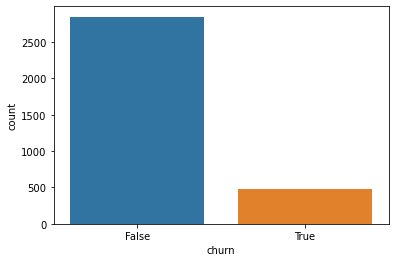

In [15]:
sns.countplot(x ='churn', data = df)
plt.show()

In [16]:
df["international plan"].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [17]:
# checking the categories for object data types
df["international plan"].unique()

array(['no', 'yes'], dtype=object)

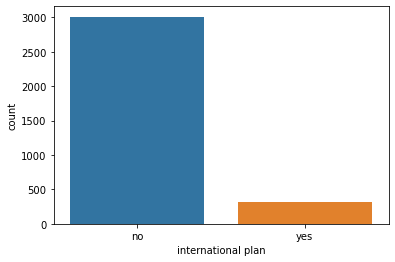

In [18]:
sns.countplot(x ='international plan', data = df)
plt.show()

In [19]:
df["voice mail plan"].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [20]:
#checking the categories for object data types
df["voice mail plan"].unique()

array(['yes', 'no'], dtype=object)

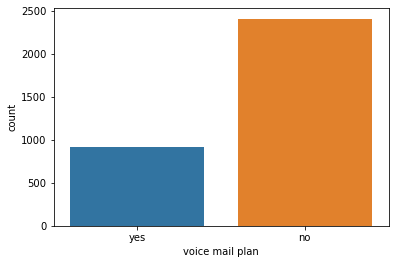

In [21]:
sns.countplot(x ='voice mail plan', data = df)
plt.show()

### Checking for outliers

In [22]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [23]:
sns.set_style("darkgrid")

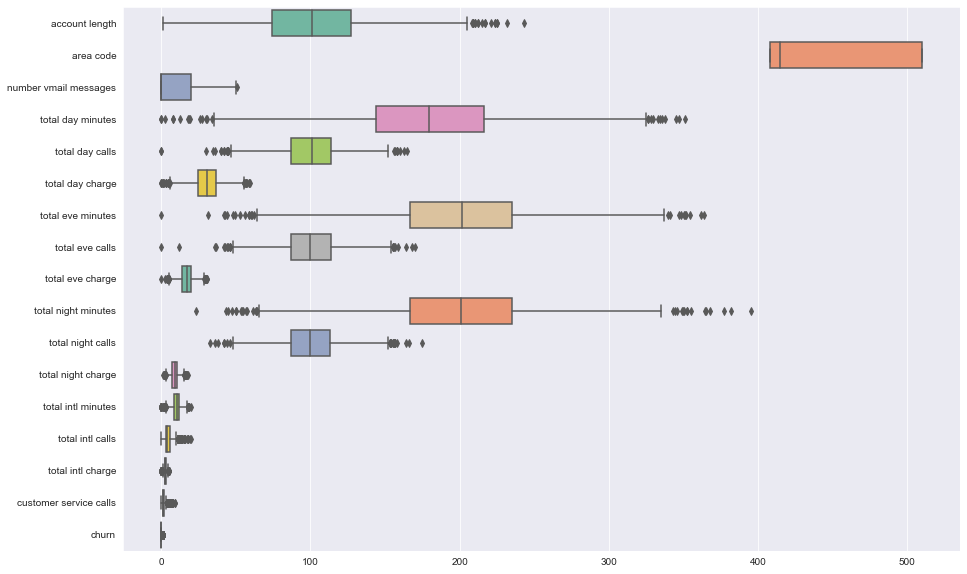

In [24]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

In [25]:
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

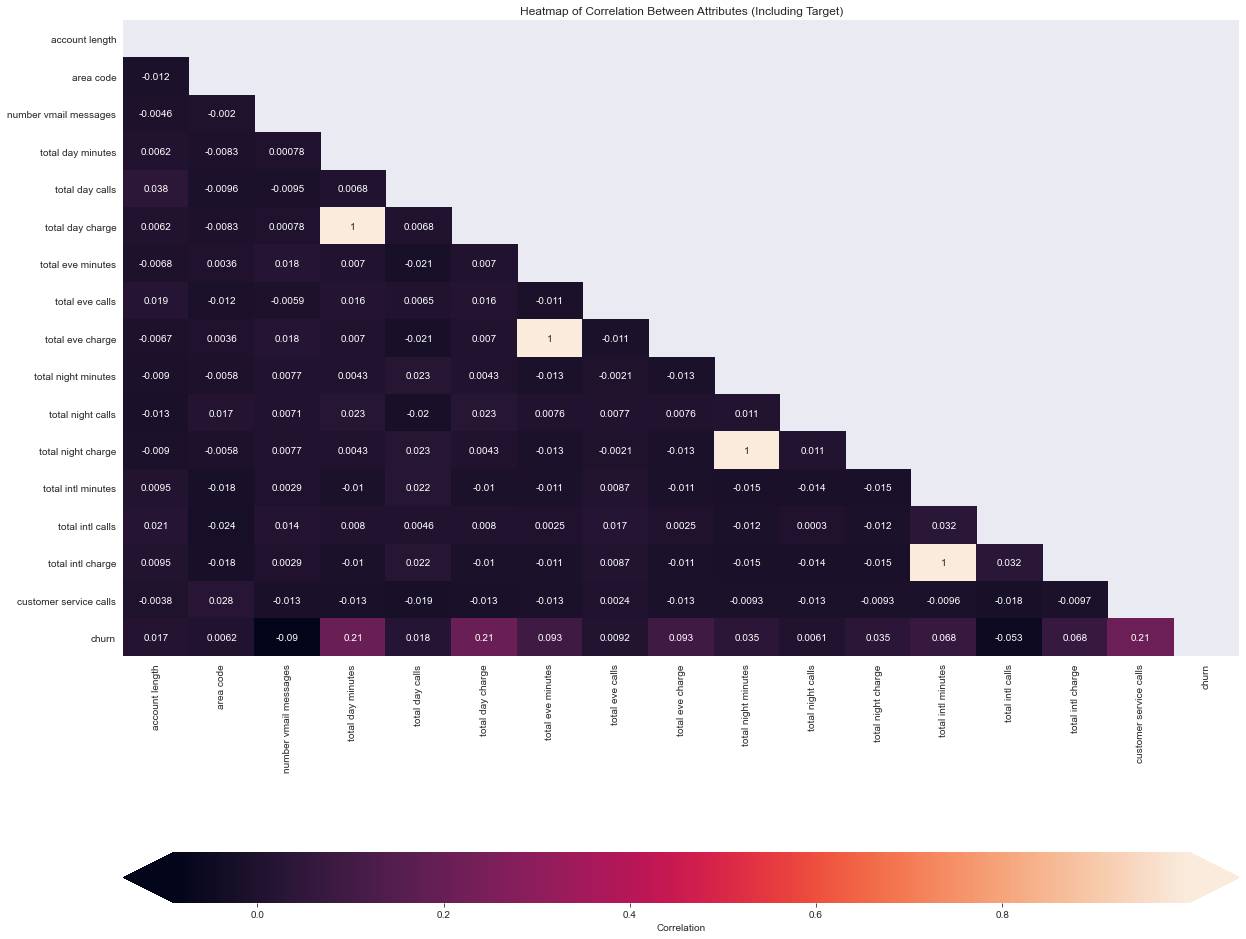

In [26]:
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");
fig.savefig("correlation_chart.png")

In [27]:
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


<p> The correlation between the different features is not very strong as we can see the color leans to the darker colors meaning low correlation</p>

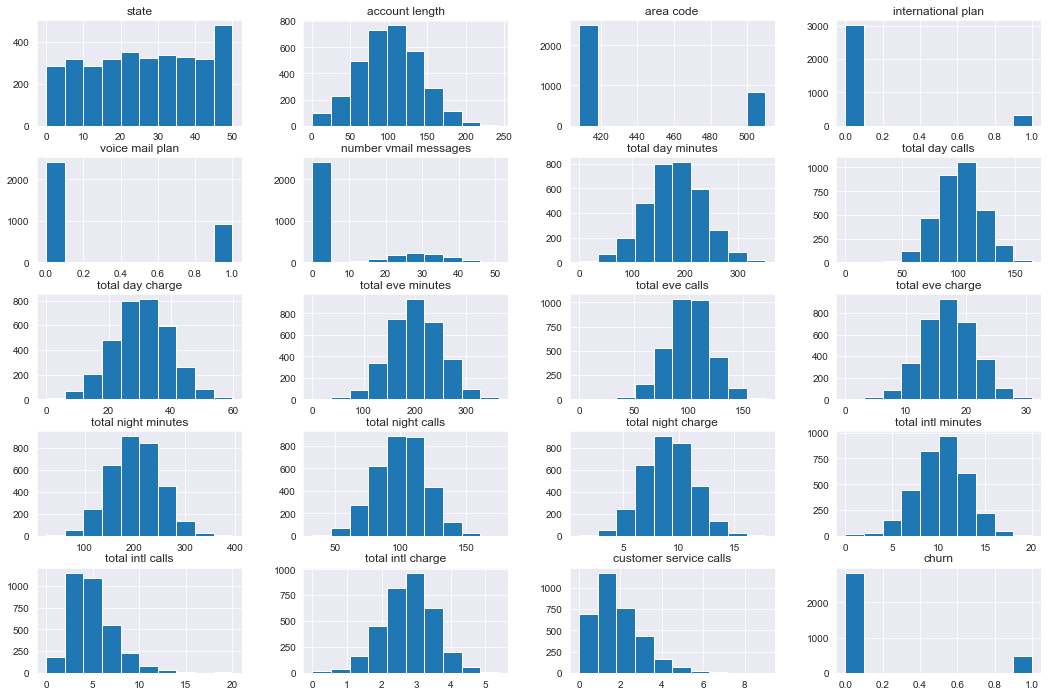

In [90]:
df.hist(figsize=(18,12));

## Preprocessing

### Encoding categorical features

In [29]:
def label_encoding(data, col_name):
    # instantiate the label encoder
    labelencoder = LabelEncoder()
    # Encode labels in the col_name 
    data[col_name] = labelencoder.fit_transform(data[col_name])
    
    return data[col_name].value_counts()


In [30]:
label_encoding(df, "churn")

0    2850
1     483
Name: churn, dtype: int64

In [31]:
label_encoding(df, "voice mail plan")

0    2411
1     922
Name: voice mail plan, dtype: int64

In [32]:
label_encoding(df, "international plan")

0    3010
1     323
Name: international plan, dtype: int64

In [33]:
df.head(10)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

In [35]:
label_encoding(df, 'state')

49    106
23     84
34     83
1      80
35     78
48     78
37     78
50     77
45     77
6      74
22     73
13     73
46     73
43     72
44     72
15     71
16     70
20     70
27     68
26     68
31     68
47     66
33     66
5      66
19     65
39     65
25     65
3      64
9      63
24     63
32     62
28     62
21     62
36     61
8      61
29     61
40     60
41     60
17     59
14     58
30     56
2      55
7      54
10     54
42     53
11     53
0      52
18     51
38     45
12     44
4      34
Name: state, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int64  
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   int64  
 4   voice mail plan         3333 non-null   int64  
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

## Modeling 

In [37]:
# split the dataframe into X and y
X = df.drop("churn", axis=1)
y = df["churn"]

# scaling the data
sc = StandardScaler()
X_scaled = sc.fit(X)
X_scaled = sc.transform(X)

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.25 ,stratify=y)

### Baseline Model

### 1. Logistic Regression

In [38]:
# Instantiate a LogisticRegression random_state=42, test_size=0.25
baseline_model = LogisticRegression(class_weight ='Balanced' ,random_state=42)

baseline_model.fit(X_train, y_train)


LogisticRegression(class_weight='Balanced', random_state=42)

### Performance Analysis

In [39]:
# Performance analysis on the train data
y_train_pred = baseline_model.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred))
print("Recall : "   ,recall_score(y_train, y_train_pred))
print("F1 score : " ,f1_score(y_train, y_train_pred))
print("Precision : ",precision_score(y_train, y_train_pred))

Accuracy :  0.8611444577831132
Recall :  0.20718232044198895
F1 score :  0.30181086519114686
Precision :  0.5555555555555556


In [40]:
# perfomance Analysis on the test data
y_test_pred = baseline_model.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred))
print("Recall : "   ,recall_score(y_test,y_test_pred))
print("F1 score : " ,f1_score(y_test,y_test_pred))
print("Precision : ",precision_score(y_test,y_test_pred))

Accuracy :  0.8597122302158273
Recall :  0.23140495867768596
F1 score :  0.3236994219653179
Precision :  0.5384615384615384


<p>
The baseline model has a relatively reliable classification accuracy of around 86% on
both the train and test data but the recall is too low with a score of 21% for the train data 
and 23% for the test data also the F1 score and precision are very low with 30%  and 55% for train
F1 score and precision respectively and 32% and 54% for the test data F1 score and precision 
</p>

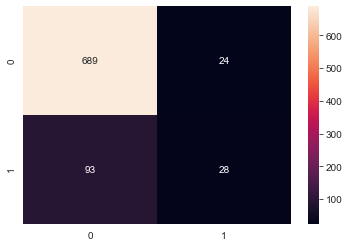

In [134]:
matrix_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix_confusion, annot=True, cmap='rocket', fmt='d')
fig.savefig("baseline_model_matrix.png")

<li>True positive : 28</li>
<li>True Negative : 689 </li>
<li>False Positive : 24 </li>
<li>False Negative : 93 </li>

### Logistic Model 1

In [47]:
seed = 42

In [48]:
logreg = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', LogisticRegression(random_state=seed))
])
#fits the data to the pipeline
logreg.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

### Logistic Model 1 performance Analysis

In [49]:
# Performance analysis on the train data
y_train_pred2 = logreg.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred2))
print("Recall : "   ,recall_score(y_train, y_train_pred2))
print("F1 score : " ,f1_score(y_train, y_train_pred2))
print("Precision : ",precision_score(y_train, y_train_pred2))

Accuracy :  0.7735094037615046
Recall :  0.7707182320441989
F1 score :  0.49644128113879016
Precision :  0.3661417322834646


In [50]:
# perfomance Analysis on the test data
y_test_pred2 = logreg.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred2))
print("Recall : "   ,recall_score(y_test,y_test_pred2))
print("F1 score : " ,f1_score(y_test,y_test_pred2))
print("Precision : ",precision_score(y_test,y_test_pred2))

Accuracy :  0.7649880095923262
Recall :  0.71900826446281
F1 score :  0.4702702702702704
Precision :  0.3493975903614458


<p>
The logreg classification accuracy is around 77% for train data and 76% on the test data 
which are not bad although it is a drop from the the baseline model which had its accuracy at
around 86% for both the train data and test ,however, the recall has significantly improved from
the baseline model which had 20% for train and 23% for test data to 77% on train data and 71% on 
the test data although F1 score of 49% for train and 37% for test and precision of 47% for train and
35% for test which is still low lower than the baseline_model 
</p>

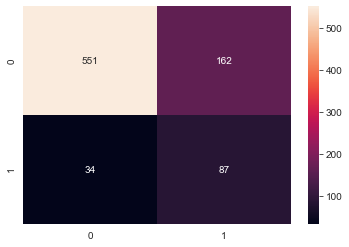

In [135]:
matrix_confusion2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(matrix_confusion2, annot=True, cmap='rocket', fmt='d')
fig.savefig("logreg_model_1_matrix.png")

<li>True positive : 87 </li>
<li>True Negative : 551 </li>
<li>False Positive : 162 </li>
<li>False Negative : 34 </li>

### Logistic Model 2

In [52]:
param_grid = {
    'classifier__max_iter': [1000, 10000, 100000],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [1, 5, 10, 100],
    'classifier__solver': ["liblinear"]
}

grid = GridSearchCV(logreg, param_grid)

output = grid.fit(X_train, y_train)

In [53]:
output.best_params_

{'classifier__C': 10,
 'classifier__max_iter': 1000,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [105]:
logreg_tuned = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', LogisticRegression(C = 10,
                                      max_iter = 1000,
                                      penalty = 'l1',
                                      solver = 'liblinear',
                                      random_state=seed))
])
#fits the data to the pipeline
logreg_tuned.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

### Logistic Model 2 performance Analysis

In [106]:
# Performance analysis on the train data
y_train_pred3 = logreg_tuned.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred3))
print("Recall : "   ,recall_score(y_train, y_train_pred3))
print("F1 score : " ,f1_score(y_train, y_train_pred3))
print("Precision : ",precision_score(y_train, y_train_pred3))

Accuracy :  0.7735094037615046
Recall :  0.7707182320441989
F1 score :  0.49644128113879016
Precision :  0.3661417322834646


In [107]:
# perfomance Analysis on the test data
y_test_pred3 = logreg_tuned.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred3))
print("Recall : "   ,recall_score(y_test,y_test_pred3))
print("F1 score : " ,f1_score(y_test,y_test_pred3))
print("Precision : ",precision_score(y_test,y_test_pred3))

Accuracy :  0.7649880095923262
Recall :  0.71900826446281
F1 score :  0.4702702702702704
Precision :  0.3493975903614458


<p>
There was no significant difference between the tuned logistic Regression model and
the previous which its hyperparameters were not optimized
</p>

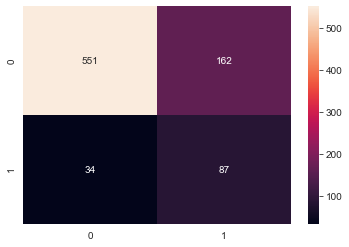

In [136]:
matrix_confusion3 = confusion_matrix(y_test, y_test_pred3)
sns.heatmap(matrix_confusion3, annot=True, cmap='rocket', fmt='d')
fig.savefig("logreg_tuned_model_matrix.png")

<li>True positive : 87 </li>
<li>True Negative : 551 </li>
<li>False Positive : 162 </li>
<li>False Negative : 34 </li>

### 2. Decision Tree

In [108]:
dtree = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=seed))
])

dtree.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

### Decision tree Model 1 performance Analysis

In [109]:
# Performance analysis on the train data
y_train_pred4 = dtree.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred4))
print("Recall : "   ,recall_score(y_train, y_train_pred4))
print("F1 score : " ,f1_score(y_train, y_train_pred4))
print("Precision : ",precision_score(y_train, y_train_pred4))

Accuracy :  1.0
Recall :  1.0
F1 score :  1.0
Precision :  1.0


In [110]:
# perfomance Analysis on the test data
y_test_pred4 = dtree.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred4))
print("Recall : "   ,recall_score(y_test,y_test_pred4))
print("F1 score : " ,f1_score(y_test,y_test_pred4))
print("Precision : ",precision_score(y_test,y_test_pred4))

Accuracy :  0.86810551558753
Recall :  0.6694214876033058
F1 score :  0.5955882352941176
Precision :  0.5364238410596026


<p>
The decision tree classification accuracy was very high on train data of 100% and 87% on test which is 
a relatively reliable model the recall dropped from 71% on the logreg_tuned model on test data to 68% on test 
for the decision tree model 1 ,however , the F1 score improved to 60% from 50% on the logreg_tuned test data
</p>

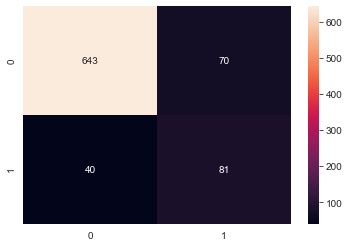

In [137]:
matrix_confusion4 = confusion_matrix(y_test, y_test_pred4)
sns.heatmap(matrix_confusion4, annot=True, cmap='rocket', fmt='d')
fig.savefig("dtree_model_matrix.png")

<li>True positive : 81 </li>
<li>True Negative : 643 </li>
<li>False Positive : 70 </li>
<li>False Negative : 40 </li>

In [112]:
dt_results = cross_validate(dtree, X_train, y_train, return_train_score=True,
                            scoring=["neg_log_loss","roc_auc"])

In [113]:
pd.DataFrame(dt_results)

,fit_time,score_time,test_neg_log_loss,train_neg_log_loss,test_roc_auc,train_roc_auc
0,0.077575,0.004648,-3.246706,-9.992007e-16,0.893107,1.0
1,0.061802,0.007387,-3.661168,-9.992007e-16,0.839888,1.0
2,0.067373,0.004051,-3.799320,-9.992007e-16,0.816352,1.0
3,0.060307,0.004338,-5.111816,-9.992007e-16,0.765712,1.0
4,0.063332,0.005312,-4.914407,-9.992007e-16,0.766751,1.0


### Decision Tree Model 2

In [65]:
param_grid = {
    "classifier__max_depth": [3, 5, 7, 10],
    "classifier__min_samples_split": [2, 3, 5,10],
    "classifier__min_samples_leaf": [2, 3, 5,10]
}


In [66]:
grid_dtree = GridSearchCV(dtree, param_grid)

output = grid_dtree.fit(X_train, y_train)

output.best_params_

{'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 10,
 'classifier__min_samples_split': 2}

In [114]:
dtree_tuned = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth = 5,
                                          min_samples_split=10,
                                          min_samples_leaf=2,
                                          random_state=seed))
])
dtree_tuned.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=10,
                                        random_state=42))])

### Decision tree Model 2 performance Analysis

In [115]:
# Performance analysis on the train data
y_train_pred5 = dtree_tuned.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred5))
print("Recall : "   ,recall_score(y_train, y_train_pred5))
print("F1 score : " ,f1_score(y_train, y_train_pred5))
print("Precision : ",precision_score(y_train, y_train_pred5))

Accuracy :  0.9163665466186475
Recall :  0.8480662983425414
F1 score :  0.7460510328068044
Precision :  0.665943600867679


In [116]:
# perfomance Analysis on the test data
y_test_pred5 = dtree_tuned.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred5))
print("Recall : "   ,recall_score(y_test,y_test_pred5))
print("F1 score : " ,f1_score(y_test,y_test_pred5))
print("Precision : ",precision_score(y_test,y_test_pred5))

Accuracy :  0.8693045563549161
Recall :  0.743801652892562
F1 score :  0.6228373702422145
Precision :  0.5357142857142857


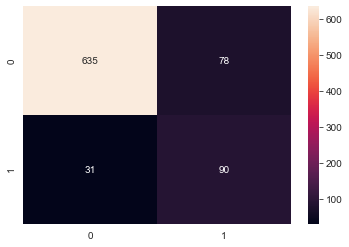

In [138]:
matrix_confusion5 = confusion_matrix(y_test, y_test_pred5)
sns.heatmap(matrix_confusion5, annot=True, cmap='rocket', fmt='d')
fig.savefig("dtree_tuned_model_matrix.png")

<li>True positive : 90 </li>
<li>True Negative : 635 </li>
<li>False Positive : 78 </li>
<li>False Negative : 31 </li>

### 3. Random Forest

In [118]:
Rforest = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=seed))
])

Rforest.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

### Random Forest Model 1 performance Analysis

In [119]:
# Performance analysis on the train data
y_train_pred6 = Rforest.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred6))
print("Recall : "   ,recall_score(y_train, y_train_pred6))
print("F1 score : " ,f1_score(y_train, y_train_pred6))
print("Precision : ",precision_score(y_train, y_train_pred6))

Accuracy :  1.0
Recall :  1.0
F1 score :  1.0
Precision :  1.0


In [120]:
# perfomance Analysis on the test data
y_test_pred6 = Rforest.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred6))
print("Recall : "   ,recall_score(y_test,y_test_pred6))
print("F1 score : " ,f1_score(y_test,y_test_pred6))
print("Precision : ",precision_score(y_test,y_test_pred6))

Accuracy :  0.9256594724220624
Recall :  0.7272727272727273
F1 score :  0.7394957983193278
Precision :  0.7521367521367521


<p>
The Random Forest has a very reliable classification accuracy on the test data of 93% ,which is the highest so far
the recall is around 74% ,which is similar to the decision tree model 2 ,however , the F1 score and precision has
improved from 62% and 54% on the decision tree model 2 respectively to 74% and 75% on the random forest model 1 
</p>

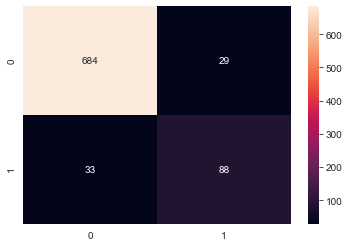

In [139]:
matrix_confusion6 = confusion_matrix(y_test, y_test_pred6)
sns.heatmap(matrix_confusion6, annot=True, cmap='rocket', fmt='d')
fig.savefig("Rforest_model_matrix.png")

<li>True positive : 88 </li>
<li>True Negative : 684 </li>
<li>False Positive : 29 </li>
<li>False Negative : 33 </li>

### Random forest model 2

In [75]:
param_grid_forest = {
    #"classifier_n_estimators" : [100, 300, 500, 800, 1200],
    'classifier__max_depth': [5, 8, 15, 25, 30],
    "classifier__min_samples_split": [2, 5, 10, 15, 100],
    "classifier__min_samples_leaf": [1, 2, 5, 10],
    #"classifier_criterion" : ["gini", "entropy"]
}


In [76]:
grid_forest = GridSearchCV(Rforest, param_grid_forest ,cv=3 ,verbose=1 )

output_Rforest = grid_forest.fit(X_train, y_train)

output_Rforest.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'classifier__max_depth': 15,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2}

In [122]:
Rforest_tuned = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=seed,
                                         max_depth = 15,
                                         min_samples_split = 2,
                                         min_samples_leaf = 2))
])

Rforest_tuned.fit(X_train, y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        random_state=42))])

### Random Forest Model 2 performance Analysis

In [123]:
# Performance analysis on the train data
y_train_pred7 = Rforest_tuned.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred7))
print("Recall : "   ,recall_score(y_train, y_train_pred7))
print("F1 score : " ,f1_score(y_train, y_train_pred7))
print("Precision : ",precision_score(y_train, y_train_pred7))

Accuracy :  0.9943977591036415
Recall :  0.9640883977900553
F1 score :  0.9803370786516854
Precision :  0.9971428571428571


In [124]:
# perfomance Analysis on the test data
y_test_pred7 = Rforest_tuned.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred7))
print("Recall : "   ,recall_score(y_test,y_test_pred7))
print("F1 score : " ,f1_score(y_test,y_test_pred7))
print("Precision : ",precision_score(y_test,y_test_pred7))

Accuracy :  0.9244604316546763
Recall :  0.7107438016528925
F1 score :  0.7319148936170212
Precision :  0.7543859649122807


<p>
After tunning the random forest model 2 the classification accuracy ,recall and F1 score slightly dropped while the 
precision remained around the same value as the untuned random forest model
</p>

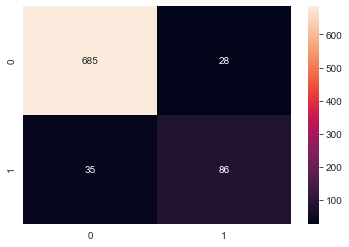

In [140]:
matrix_confusion7 = confusion_matrix(y_test, y_test_pred7)
sns.heatmap(matrix_confusion7, annot=True, cmap='rocket', fmt='d')
fig.savefig("Rforest_tuned_model_matrix.png")

<li>True positive : 86 </li>
<li>True Negative : 685 </li>
<li>False Positive : 28 </li>
<li>False Negative : 35 </li>

### Gradient Boosting Trees Model

In [126]:
GBtree = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state= seed,
                                              n_estimators= 150,
                                              learning_rate=0.1
                                            ))
])

GBtree.fit(X_train,y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=150,
                                            random_state=42))])

### Gradient Boosting Model Performance Analysis

In [127]:
# Performance analysis on the train data
y_train_pred8 = GBtree.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred8))
print("Recall : "   ,recall_score(y_train, y_train_pred8))
print("F1 score : " ,f1_score(y_train, y_train_pred8))
print("Precision : ",precision_score(y_train, y_train_pred8))

Accuracy :  0.969187675070028
Recall :  0.8646408839779005
F1 score :  0.8904694167852062
Precision :  0.9178885630498533


In [128]:
# perfomance Analysis on the test data
y_test_pred8 = GBtree.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred8))
print("Recall : "   ,recall_score(y_test,y_test_pred8))
print("F1 score : " ,f1_score(y_test,y_test_pred8))
print("Precision : ",precision_score(y_test,y_test_pred8))

Accuracy :  0.9244604316546763
Recall :  0.7272727272727273
F1 score :  0.7364016736401674
Precision :  0.7457627118644068


<p>
The Gradient Boosting classifier has slightly improved from the Rforest_tuned ie for the recall it has improved from
71% on Rforest_tuned to 73% on Gradient Boosting and the F1 score has improved from 73% on Rforest_tuned to 74% on
gradient boosting ,however, the random forest model had similar scores but with a higher classification accuracy of
93% 
</p>

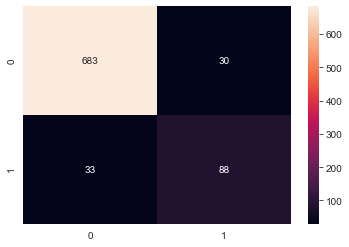

In [141]:
matrix_confusion8 = confusion_matrix(y_test, y_test_pred8)
sns.heatmap(matrix_confusion8, annot=True, cmap='rocket', fmt='d')
fig.savefig("GBtree_model_matrix.png")

<li>True positive : 88 </li>
<li>True Negative : 683 </li>
<li>False Positive : 30 </li>
<li>False Negative : 33 </li>

### Stacking the Models 

In [85]:
log_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=seed ,max_depth=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed ,max_depth=15)
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=120, random_state=seed)

In [130]:
Stacking = Pipeline(steps=[
    ("sampling", SMOTE(random_state=seed)),
    ("scaler", StandardScaler()),
    ('classifier', StackingClassifier(classifiers=[dt_model,rf_model,gb_model],
                           meta_classifier=log_model))
])

Stacking.fit(X_train,y_train)

Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('scaler', StandardScaler()),
                ('classifier',
                 StackingClassifier(classifiers=[DecisionTreeClassifier(max_depth=5,
                                                                        random_state=42),
                                                 RandomForestClassifier(max_depth=15,
                                                                        random_state=42),
                                                 GradientBoostingClassifier(learning_rate=0.01,
                                                                            n_estimators=120,
                                                                            random_state=42)],
                                    meta_classifier=LogisticRegression()))])

### Stacking Classifier Model Performance Analysis

In [131]:
# Performance analysis on the train data
y_train_pred9 = Stacking.predict(X_train)

print("Accuracy : " ,accuracy_score(y_train, y_train_pred9))
print("Recall : "   ,recall_score(y_train, y_train_pred9))
print("F1 score : " ,f1_score(y_train, y_train_pred9))
print("Precision : ",precision_score(y_train, y_train_pred9))

Accuracy :  0.9975990396158463
Recall :  0.9834254143646409
F1 score :  0.9916434540389973
Precision :  1.0


In [132]:
# perfomance Analysis on the test data
y_test_pred9 = Stacking.predict(X_test)

print("Accuracy : " ,accuracy_score(y_test,y_test_pred9))
print("Recall : "   ,recall_score(y_test,y_test_pred9))
print("F1 score : " ,f1_score(y_test,y_test_pred9))
print("Precision : ",precision_score(y_test,y_test_pred9))

Accuracy :  0.920863309352518
Recall :  0.7107438016528925
F1 score :  0.7226890756302521
Precision :  0.7350427350427351


<p>
The Stacking model had lower scores when compared to Gradient Boosting and Random forest model 1 
</p>

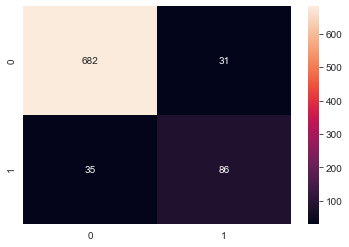

In [142]:
matrix_confusion9 = confusion_matrix(y_test, y_test_pred9)
sns.heatmap(matrix_confusion9, annot=True, cmap='rocket', fmt='d')
fig.savefig("Stacking_model_matrix.png")

<li>True positive : 86 </li>
<li>True Negative : 682 </li>
<li>False Positive : 31 </li>
<li>False Negative : 35 </li>

## Conclusion

### Final Model 

<p> The final model picked was the Random forest model 1 which had the highest metrics of :
 <li>Classification Accuracy  : 93% </li>
 <li>Classification recall    : 73% </li>
 <li>Classification F1 score  : 74% </li>
 <li>Classification precision : 75% </li>
</p>
<p>This model had a very high classification accuracy of 93% and also it had a balance in the other evaluating metrics above 70% for recall , F1 score and precision</p>